# Discovering Frequent Patterns in Uncertain Big Data Using TubeP Algorithm

In this tutorial, we will discuss two approaches to find frequent patterns in uncertain big data using TubeP algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing TubeP on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the PUFGrowth algorithm

In [1]:
from PAMI.uncertainFrequentPattern.basic import TubeP as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'uncertainTransaction_T10I4D200K.csv'

minimumSupportCount = 300  #Users can also specify this constraint between 0 to 1.
seperator = '\t'       

#### Step 3: Execute the PUFGrowth algorithm

In [3]:
obj = alg.TubeP(iFile=inputFile, minSup=minimumSupportCount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

Total number of false patterns generated: 1969
Uncertain Frequent patterns were generated successfully using TubeP algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save('frequentPatternsMinSupCount300.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 874


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 292.42088198661804


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 1026658304
Memory (USS): 988524544


# Advanced Tutorial on Implementing TubeP Algorithm

***

#### In this tutorial, we explain how the TubeP algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the TubeP algorithm and pandas data frame

In [1]:
from PAMI.uncertainFrequentPattern.basic import TubeP  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'uncertainTransaction_T10I4D200K.csv'
seperator = '\t'
minimumSupportCountList = [300, 400, 500, 600, 700]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PUFGrowth algorithm

#### Step 3: Execute the TubeP algorithm using a for loop

In [3]:
algorithm = 'TubeP'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.TubeP(inputFile, minSup=minSupCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Total number of false patterns generated: 1969
Uncertain Frequent patterns were generated successfully using TubeP algorithm
Total number of false patterns generated: 2169
Uncertain Frequent patterns were generated successfully using TubeP algorithm
Total number of false patterns generated: 2264
Uncertain Frequent patterns were generated successfully using TubeP algorithm
Total number of false patterns generated: 2325
Uncertain Frequent patterns were generated successfully using TubeP algorithm
Total number of false patterns generated: 2367
Uncertain Frequent patterns were generated successfully using TubeP algorithm


In [4]:
print(result)

  algorithm  minSup  patterns     runtime      memory
0     TubeP     300       874  295.158076  1027391488
1     TubeP     400       674  288.895234  1017475072
2     TubeP     500       579  290.124622  1005727744
3     TubeP     600       518  292.453257   991961088
4     TubeP     700       476  291.994424   980361216


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

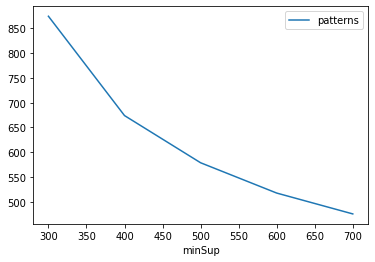

Graph for No Of Patterns is successfully generated!


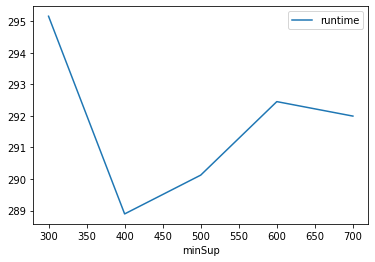

Graph for Runtime taken is successfully generated!


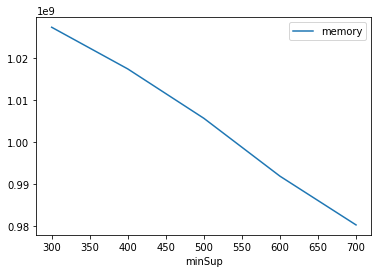

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
